In [1]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging

# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [2]:
# BATCH_SIZE = 64
# window_size = 6
# prediction_horizon = 6
# target_col = 'value'

# input_folder = 'data/ohio-data/processed'
# output_folder_train = 'data/ohio-data/processed/cleaned'  # Create a subfolder for processed files
# output_folder_test = 'data/ohio-data/processed/cleaned_test'
scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [3]:
model_type = 'shared-layer'
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']

# train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon,
#                                                                                     model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)


In [4]:
window_size = 12
BATCH_SIZE = 64

In [6]:
# prediction_horizons = [15,30,60,90,120,150,180]
# prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
prediction_horizons = [6]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [7]:
# train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon,
#                                                                                     model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
    

In [ ]:
for prediction_horizon in prediction_horizons:
    logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
    print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
   
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon,
                                                                                    model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True)
    
    # model = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
    # model = model.to(device)
    # model, history = train_model(model, train_loader, val_loader = validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
    # histories_withval_PHs[prediction_horizon] = history

    model_all_train = SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape, num_heads=4, kernel_size=3, dropout=0.2) 
    model_all_train = model_all_train.to(device)
    model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=200, learning_rate=0.00001, model_type = model_type)
    histories_noval_PHs[prediction_horizon] = history2


    model_all_train.eval()
    each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


    # logger.info(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {mae}")
    # logger.info(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {rmse}")
    # print(f"Average MAE of Prediction Horizon {str(prediction_horizon)}: {mae}")
    # print(f"Average RMSE of Prediction Horizon {str(prediction_horizon)}: {rmse}")

    
    abs_patients_errors_PHs[prediction_horizon] = each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = each_patient_rmse
    # MAE_Patients_PHs[prediction_horizon] = mae
    # RMSE_Patients_PHs[prediction_horizon] = rmse


    logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
    print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
    torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}.pth')
    print(f"model_{model_type}_attention_{str(prediction_horizon)} saved")
    logger.info(f"model_{model_type}_attention_{str(prediction_horizon)} saved")


Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/200: 100%|██████████| 213/213 [00:28<00:00,  7.44batch/s, mae_loss=0.641]


Epoch [1/200], Training MAE: 0.6596, Training RMSE: 0.9033
Epoch [1/200], Validation MAE: 0.5324, Validation RMSE: 0.8070


Epoch 2/200: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.612]


Epoch [2/200], Training MAE: 0.6466, Training RMSE: 0.8872
Epoch [2/200], Validation MAE: 0.5174, Validation RMSE: 0.7838


Epoch 3/200: 100%|██████████| 213/213 [00:23<00:00,  9.19batch/s, mae_loss=0.543]


Epoch [3/200], Training MAE: 0.6156, Training RMSE: 0.8462
Epoch [3/200], Validation MAE: 0.4792, Validation RMSE: 0.7251


Epoch 4/200: 100%|██████████| 213/213 [00:20<00:00, 10.37batch/s, mae_loss=0.496]


Epoch [4/200], Training MAE: 0.5416, Training RMSE: 0.7528
Epoch [4/200], Validation MAE: 0.4092, Validation RMSE: 0.6206


Epoch 5/200: 100%|██████████| 213/213 [00:21<00:00, 10.00batch/s, mae_loss=0.463]


Epoch [5/200], Training MAE: 0.4666, Training RMSE: 0.6586
Epoch [5/200], Validation MAE: 0.3702, Validation RMSE: 0.5617


Epoch 6/200: 100%|██████████| 213/213 [00:21<00:00,  9.75batch/s, mae_loss=0.441]


Epoch [6/200], Training MAE: 0.4389, Training RMSE: 0.6244
Epoch [6/200], Validation MAE: 0.3558, Validation RMSE: 0.5480


Epoch 7/200: 100%|██████████| 213/213 [00:21<00:00,  9.84batch/s, mae_loss=0.447]


Epoch [7/200], Training MAE: 0.4320, Training RMSE: 0.6173
Epoch [7/200], Validation MAE: 0.3491, Validation RMSE: 0.5423


Epoch 8/200: 100%|██████████| 213/213 [00:20<00:00, 10.25batch/s, mae_loss=0.433]


Epoch [8/200], Training MAE: 0.4284, Training RMSE: 0.6131
Epoch [8/200], Validation MAE: 0.3468, Validation RMSE: 0.5397


Epoch 9/200: 100%|██████████| 213/213 [00:19<00:00, 10.65batch/s, mae_loss=0.412]


Epoch [9/200], Training MAE: 0.4252, Training RMSE: 0.6092
Epoch [9/200], Validation MAE: 0.3442, Validation RMSE: 0.5374


Epoch 10/200: 100%|██████████| 213/213 [00:20<00:00, 10.58batch/s, mae_loss=0.408]


Epoch [10/200], Training MAE: 0.4228, Training RMSE: 0.6060
Epoch [10/200], Validation MAE: 0.3424, Validation RMSE: 0.5343


Epoch 11/200: 100%|██████████| 213/213 [00:19<00:00, 11.16batch/s, mae_loss=0.412]


Epoch [11/200], Training MAE: 0.4204, Training RMSE: 0.6033
Epoch [11/200], Validation MAE: 0.3402, Validation RMSE: 0.5308


Epoch 12/200: 100%|██████████| 213/213 [00:19<00:00, 11.15batch/s, mae_loss=0.442]


Epoch [12/200], Training MAE: 0.4177, Training RMSE: 0.6003
Epoch [12/200], Validation MAE: 0.3387, Validation RMSE: 0.5296


Epoch 13/200: 100%|██████████| 213/213 [00:19<00:00, 11.15batch/s, mae_loss=0.413]


Epoch [13/200], Training MAE: 0.4155, Training RMSE: 0.5973
Epoch [13/200], Validation MAE: 0.3361, Validation RMSE: 0.5264


Epoch 14/200: 100%|██████████| 213/213 [00:18<00:00, 11.24batch/s, mae_loss=0.381]


Epoch [14/200], Training MAE: 0.4131, Training RMSE: 0.5943
Epoch [14/200], Validation MAE: 0.3355, Validation RMSE: 0.5246


Epoch 15/200: 100%|██████████| 213/213 [00:19<00:00, 10.85batch/s, mae_loss=0.39] 


Epoch [15/200], Training MAE: 0.4105, Training RMSE: 0.5911
Epoch [15/200], Validation MAE: 0.3329, Validation RMSE: 0.5218


Epoch 16/200: 100%|██████████| 213/213 [00:20<00:00, 10.34batch/s, mae_loss=0.401]


Epoch [16/200], Training MAE: 0.4079, Training RMSE: 0.5878
Epoch [16/200], Validation MAE: 0.3306, Validation RMSE: 0.5183


Epoch 17/200: 100%|██████████| 213/213 [00:18<00:00, 11.25batch/s, mae_loss=0.374]


Epoch [17/200], Training MAE: 0.4051, Training RMSE: 0.5844
Epoch [17/200], Validation MAE: 0.3281, Validation RMSE: 0.5149


Epoch 18/200: 100%|██████████| 213/213 [00:21<00:00,  9.96batch/s, mae_loss=0.383]


Epoch [18/200], Training MAE: 0.4022, Training RMSE: 0.5807
Epoch [18/200], Validation MAE: 0.3259, Validation RMSE: 0.5117


Epoch 19/200: 100%|██████████| 213/213 [00:19<00:00, 11.16batch/s, mae_loss=0.411]


Epoch [19/200], Training MAE: 0.3991, Training RMSE: 0.5763
Epoch [19/200], Validation MAE: 0.3231, Validation RMSE: 0.5073


Epoch 20/200: 100%|██████████| 213/213 [00:21<00:00, 10.01batch/s, mae_loss=0.389]


Epoch [20/200], Training MAE: 0.3952, Training RMSE: 0.5714
Epoch [20/200], Validation MAE: 0.3198, Validation RMSE: 0.5028


Epoch 21/200: 100%|██████████| 213/213 [00:21<00:00,  9.85batch/s, mae_loss=0.365]


Epoch [21/200], Training MAE: 0.3907, Training RMSE: 0.5655
Epoch [21/200], Validation MAE: 0.3161, Validation RMSE: 0.4969


Epoch 22/200: 100%|██████████| 213/213 [00:20<00:00, 10.52batch/s, mae_loss=0.344]


Epoch [22/200], Training MAE: 0.3856, Training RMSE: 0.5587
Epoch [22/200], Validation MAE: 0.3115, Validation RMSE: 0.4906


Epoch 23/200: 100%|██████████| 213/213 [00:19<00:00, 11.00batch/s, mae_loss=0.388]


Epoch [23/200], Training MAE: 0.3801, Training RMSE: 0.5516
Epoch [23/200], Validation MAE: 0.3071, Validation RMSE: 0.4840


Epoch 24/200: 100%|██████████| 213/213 [00:20<00:00, 10.49batch/s, mae_loss=0.43] 


Epoch [24/200], Training MAE: 0.3750, Training RMSE: 0.5447
Epoch [24/200], Validation MAE: 0.3025, Validation RMSE: 0.4770


Epoch 25/200: 100%|██████████| 213/213 [00:21<00:00, 10.10batch/s, mae_loss=0.392]


Epoch [25/200], Training MAE: 0.3690, Training RMSE: 0.5368
Epoch [25/200], Validation MAE: 0.2969, Validation RMSE: 0.4693


Epoch 26/200: 100%|██████████| 213/213 [00:23<00:00,  9.08batch/s, mae_loss=0.355]


Epoch [26/200], Training MAE: 0.3626, Training RMSE: 0.5284
Epoch [26/200], Validation MAE: 0.2922, Validation RMSE: 0.4611


Epoch 27/200: 100%|██████████| 213/213 [00:22<00:00,  9.55batch/s, mae_loss=0.362]


Epoch [27/200], Training MAE: 0.3564, Training RMSE: 0.5197
Epoch [27/200], Validation MAE: 0.2859, Validation RMSE: 0.4521


Epoch 28/200: 100%|██████████| 213/213 [00:20<00:00, 10.55batch/s, mae_loss=0.336]


Epoch [28/200], Training MAE: 0.3499, Training RMSE: 0.5110
Epoch [28/200], Validation MAE: 0.2796, Validation RMSE: 0.4426


Epoch 29/200: 100%|██████████| 213/213 [00:19<00:00, 10.87batch/s, mae_loss=0.36] 


Epoch [29/200], Training MAE: 0.3435, Training RMSE: 0.5023
Epoch [29/200], Validation MAE: 0.2732, Validation RMSE: 0.4342


Epoch 30/200: 100%|██████████| 213/213 [00:20<00:00, 10.36batch/s, mae_loss=0.339]


Epoch [30/200], Training MAE: 0.3374, Training RMSE: 0.4942
Epoch [30/200], Validation MAE: 0.2674, Validation RMSE: 0.4262


Epoch 31/200: 100%|██████████| 213/213 [00:19<00:00, 10.94batch/s, mae_loss=0.361]


Epoch [31/200], Training MAE: 0.3327, Training RMSE: 0.4880
Epoch [31/200], Validation MAE: 0.2632, Validation RMSE: 0.4200


Epoch 32/200: 100%|██████████| 213/213 [00:22<00:00,  9.61batch/s, mae_loss=0.328]


Epoch [32/200], Training MAE: 0.3283, Training RMSE: 0.4821
Epoch [32/200], Validation MAE: 0.2596, Validation RMSE: 0.4146


Epoch 33/200:  93%|█████████▎| 198/213 [00:21<00:01, 10.76batch/s, mae_loss=0.318]

In [ ]:
# for i in histories_withval_PHs.items():
#     print(f"Prediction horizon {i[0]}")
#     plot_loss_curves(i[1])

Prediction horizon 6


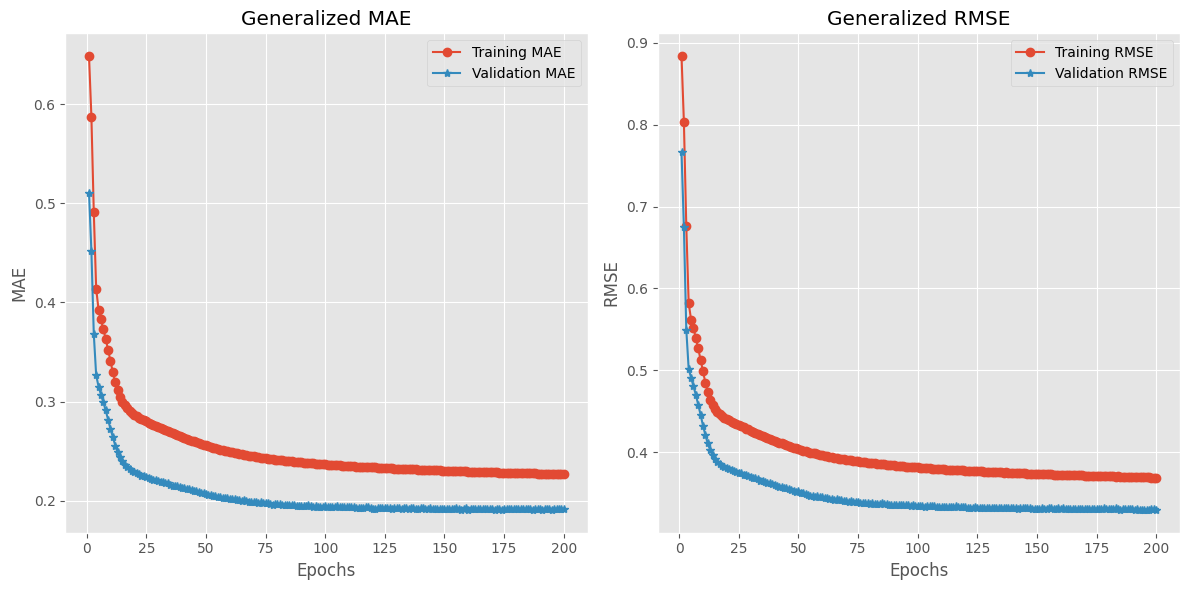

In [10]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [11]:
np.mean(list(abs_patients_errors_PHs[6].values()))

13.048764854561222

In [9]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = patient_mae
    mean_ph.append(np.mean(list(patient_mae.values())))
    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break
abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,6,12
559,10.570659,19.501278
563,15.358733,26.068849
570,10.152455,17.817194
575,14.430361,24.778654
588,15.625501,26.991846
591,15.729990,25.474001
540,12.929053,25.828644
544,12.723286,23.048798
552,13.253524,23.525446
567,15.459673,27.130840


In [10]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph2 = []

for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    mean_ph2.append(np.mean(list(patient_rmse.values())))
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph2
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,6,12
559,15.526927,26.052488
563,22.337550,35.453839
570,15.154867,23.894283
575,22.365704,34.633347
588,20.831977,35.731060
591,22.109651,32.948192
540,17.872675,34.259019
544,18.877752,31.188044
552,18.595937,31.232743
567,22.542896,37.529048


In [26]:
model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
model_all_train_read.to(device)
model_all_train_read.eval()


C:\Users\menna\AppData\Local\Temp\ipykernel_8948\2291275183.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_all_train_read.load_state_dict(torch.load('saved_models

SharedLayerModelWithAttention(
  (pre_shared_personalized_cnn): ModuleList(
    (0-11): 12 x Conv1d(1, 64, kernel_size=(4,), stride=(2,), padding=(1,), dilation=(2,))
  )
  (pre_shared_personalized_gru): ModuleList(
    (0-11): 12 x GRU(64, 64, batch_first=True)
  )
  (task_specific_attention): ModuleList(
    (0-11): 12 x MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
    )
  )
  (shared_lstm): GRU(64, 128, batch_first=True)
  (personalized_fc): ModuleList(
    (0-11): 12 x Linear(in_features=128, out_features=64, bias=True)
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (output_layer): Linear(in_features=768, out_features=12, bias=True)
)

In [27]:
# df = pd.read_csv("data\\ohio-data\\processed\\2018\\test\\559_testing.csv")
# # df['value']
# X, y = prepare_time_series_data(df, 'value', window_size, prediction_horizon)

In [28]:
# plt.figure(figsize=(13,5))
# plt.plot(np.arange(len(df['value'])), df['value'])

In [29]:
_, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
                                                                                    window_size,BATCH_SIZE, prediction_horizon = 6,
                                                                                    model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


In [30]:
# outputs = []
# targets = []
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     for inputs, target in test_loader:
#         # Move data to device (GPU or CPU) 
#         inputs = [inp for inp in inputs]
#         # inputs = torch.tensor(np.array(inputs)).to(device)
#         inputs = torch.tensor(np.array(inputs))

#         # target = target.to(device)
#         # print(targets[0])
#         # print(targets)
#         # Forward pass
#         output = model_all_train_read(inputs)
#         outputs.append(output)
#         targets.append(target)

In [31]:
outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [32]:
outputs = torch.cat(outputs_all_batches, dim=0)
targets = torch.cat(targets_all_batches, dim=0)

outputs = outputs.cpu()
targets = targets.cpu()
# Create a mask where arr1 equals 0


In [33]:
mask = (targets == 0.0)

# Set elements to None (or np.nan for float compatibility)
targets = np.where(mask, None, targets)
outputs = np.where(mask, None, outputs)

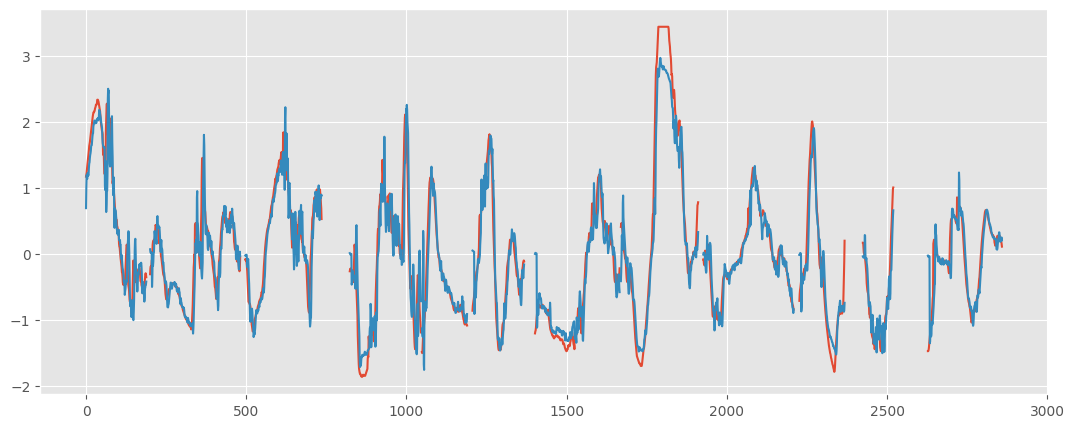

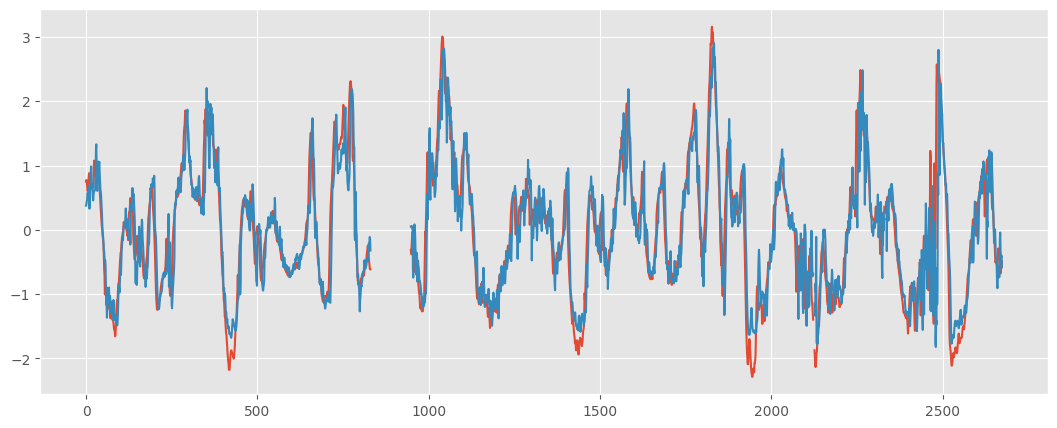

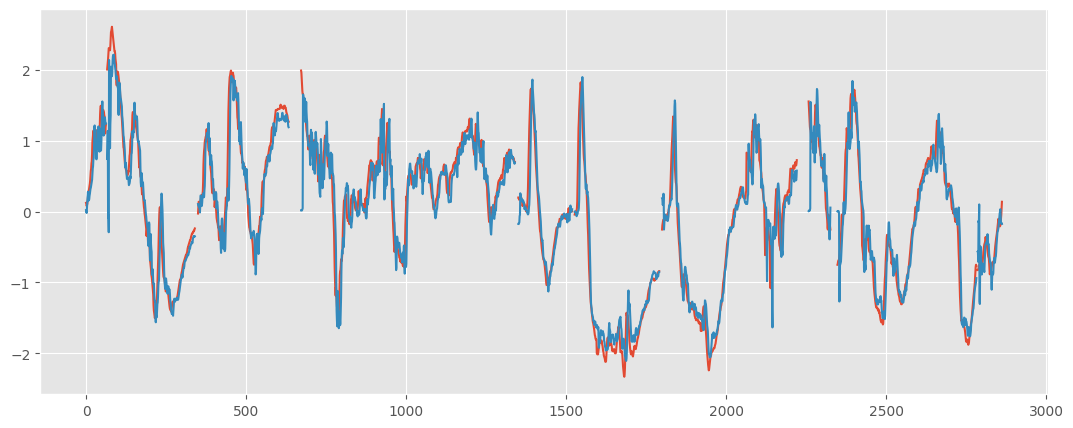

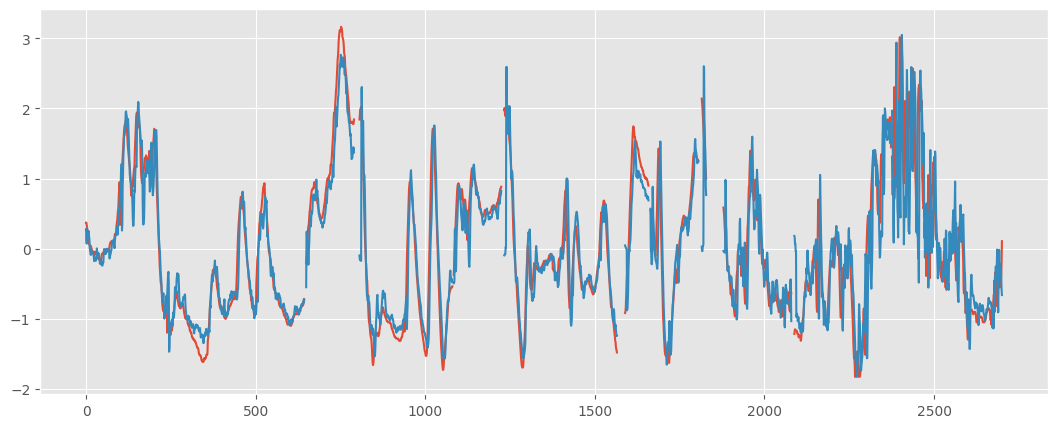

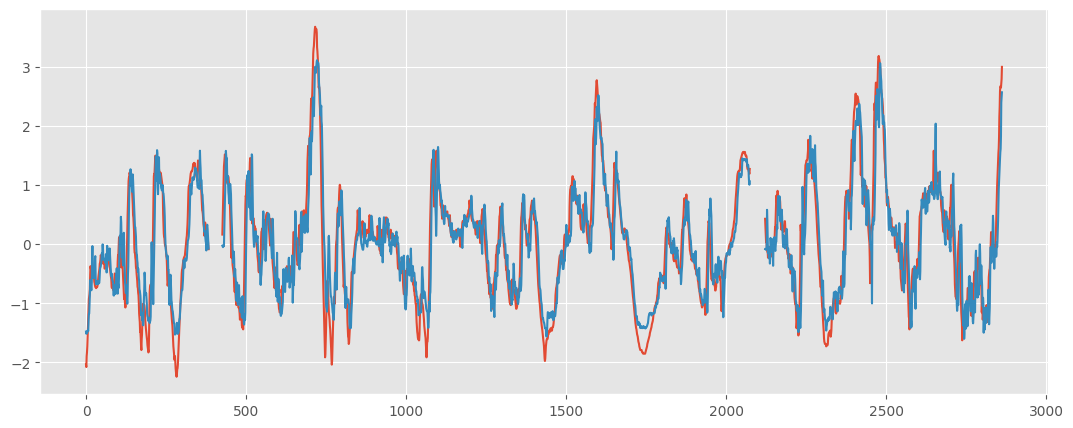

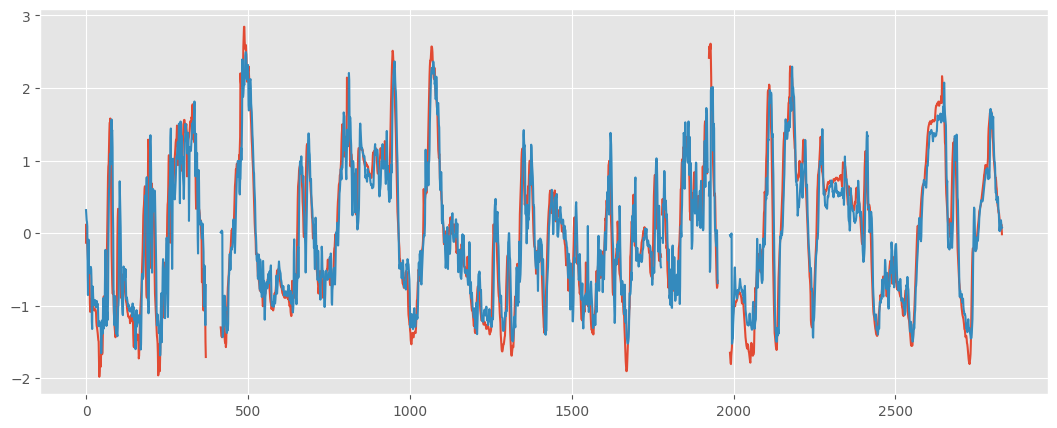

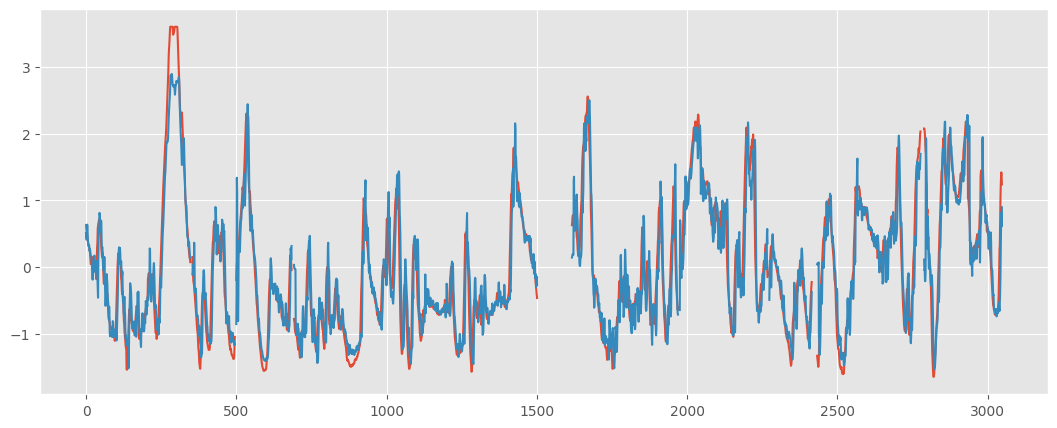

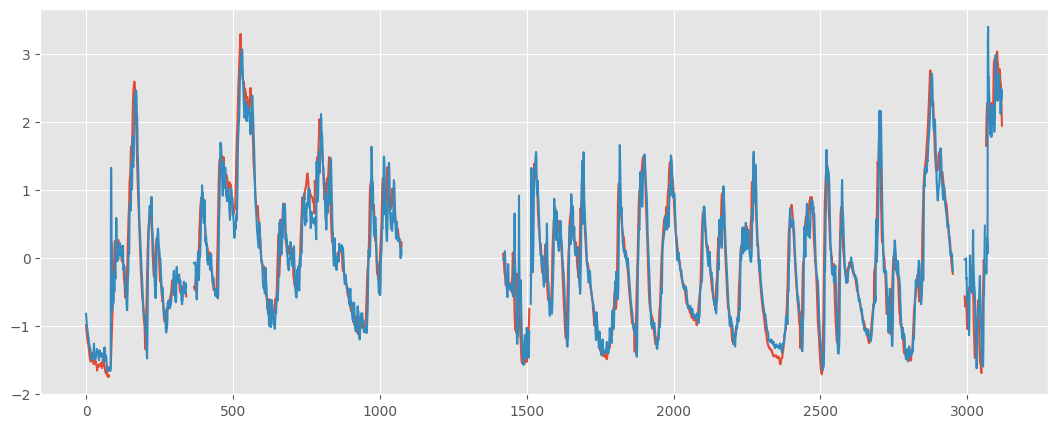

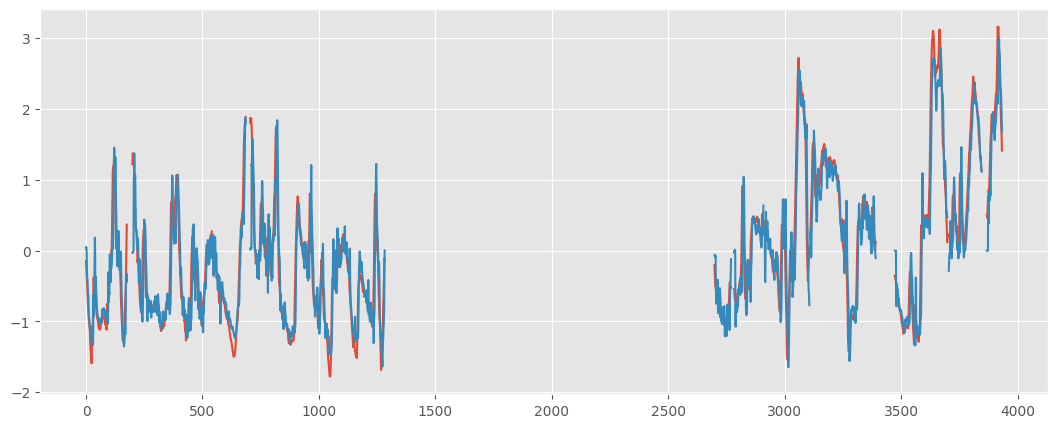

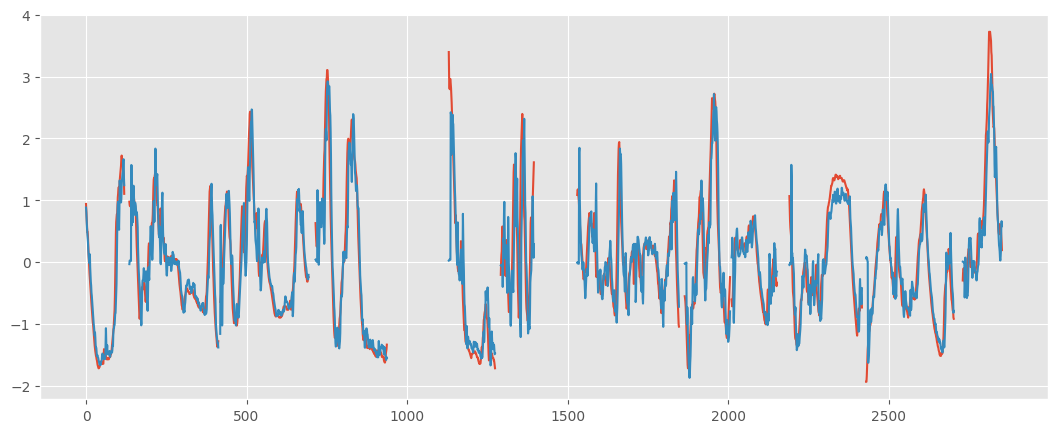

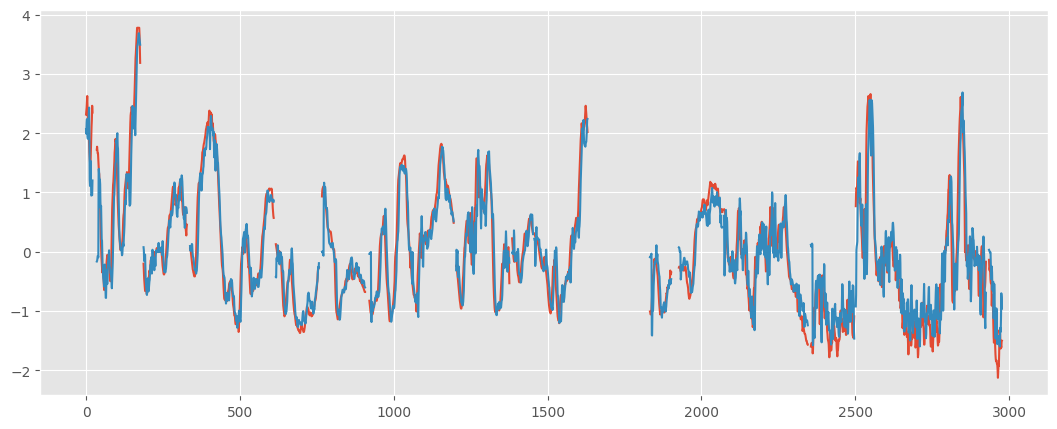

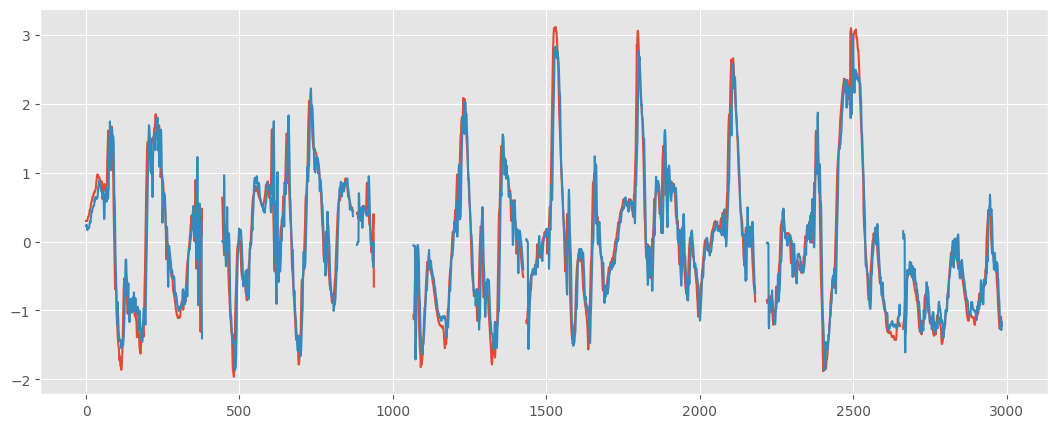

In [34]:
# index =4
for index in range(12):
    patient1_target = [sublist[index] for sublist in targets]
    patient1_output = [sublist[index]  for sublist in outputs]
    # patient1_output = outputs_all_batches[index]
    # patient1_target = targets_all_batches[index]

    # print(list(abs_patients_errors_PHs[6].values())[index])
    # print(list(squared_patients_errors_PHs[6].values())[index])

    plt.figure(figsize=(13,5))
    plt.plot(patient1_target)
    plt.plot(patient1_output)
    plt.show()

In [280]:
mae, rmse, each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
d:\NISC\Glucose biomedical\shared layer project\biomedical-env\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, 

In [ ]:
squared_patients_errors_PHs_df = pd.DataFrame()
for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = list(RMSE_Patients_PHs.values())
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

In [247]:
# test_list = [(patient1_target[i] - patient1_output[i])**2 if type(patient1_target[i]) != type(None) else None for i in range(len(patient1_target))]
# filtered_data = [x for x in test_list if x is not None]
# np.sqrt(np.mean(filtered_data))

In [20]:
summary(model, input_size=[(64, 1), (64, 1)])

Shape before output layer: torch.Size([2, 128])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 30]             320
               GRU-2  [[-1, 30, 128], [-1, 2, 128]]               0
            Conv1d-3               [-1, 64, 30]             320
               GRU-4  [[-1, 30, 128], [-1, 2, 128]]               0
            Linear-5                   [-1, 64]           8,256
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 64]           8,256
           Dropout-8                   [-1, 64]               0
            Linear-9                   [-1, 12]           1,548
Total params: 18,700
Trainable params: 18,700
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 14.97
Params size (MB): 0.07
Estimated Total Size

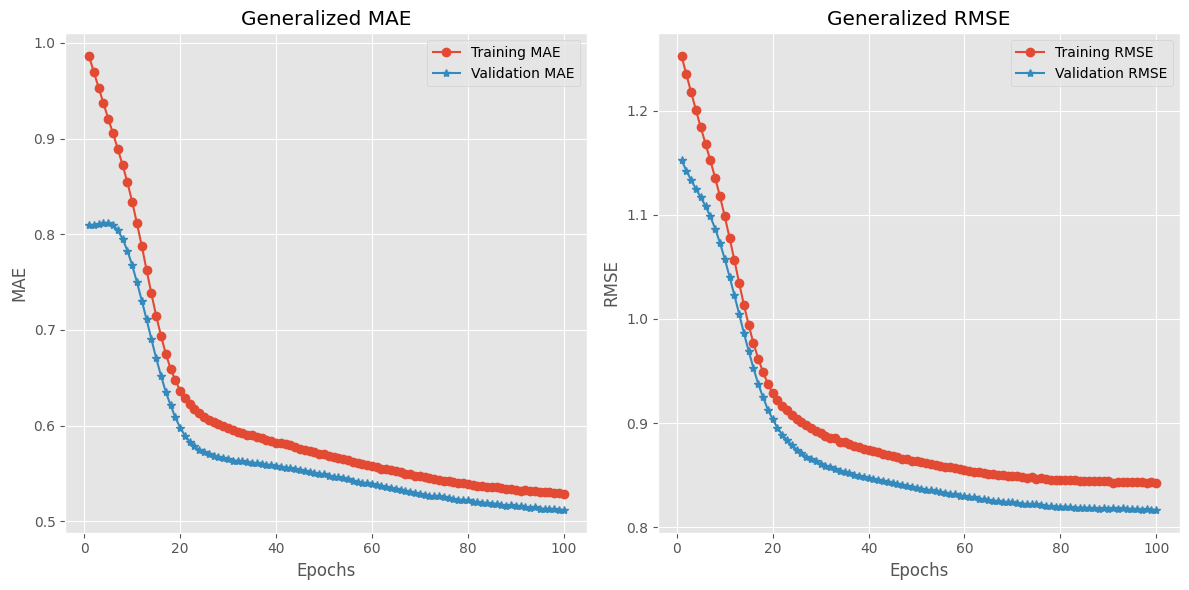

In [10]:
plot_loss_curves(history)

In [12]:
model_all_train = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
model_all_train = model_all_train.to(device)
model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=100, learning_rate=0.00001, model_type = 'shared-layer')

Epoch 1/100: 100%|██████████| 213/213 [00:11<00:00, 18.93batch/s, mae_loss=0.873]


Epoch [1/100], Training MAE: 0.9355, Training RMSE: 1.2276
Epoch [1/100], Validation MAE: 0.7535, Validation RMSE: 1.0902


Epoch 2/100: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.908]


Epoch [2/100], Training MAE: 0.9187, Training RMSE: 1.2079
Epoch [2/100], Validation MAE: 0.7512, Validation RMSE: 1.0770


Epoch 3/100: 100%|██████████| 213/213 [00:12<00:00, 17.67batch/s, mae_loss=0.905]


Epoch [3/100], Training MAE: 0.9019, Training RMSE: 1.1885
Epoch [3/100], Validation MAE: 0.7469, Validation RMSE: 1.0636


Epoch 4/100: 100%|██████████| 213/213 [00:11<00:00, 18.14batch/s, mae_loss=0.879]


Epoch [4/100], Training MAE: 0.8839, Training RMSE: 1.1679
Epoch [4/100], Validation MAE: 0.7402, Validation RMSE: 1.0491


Epoch 5/100: 100%|██████████| 213/213 [00:11<00:00, 18.16batch/s, mae_loss=0.83] 


Epoch [5/100], Training MAE: 0.8637, Training RMSE: 1.1460
Epoch [5/100], Validation MAE: 0.7284, Validation RMSE: 1.0323


Epoch 6/100: 100%|██████████| 213/213 [00:11<00:00, 18.74batch/s, mae_loss=0.875]


Epoch [6/100], Training MAE: 0.8405, Training RMSE: 1.1222
Epoch [6/100], Validation MAE: 0.7098, Validation RMSE: 1.0114


Epoch 7/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.788]


Epoch [7/100], Training MAE: 0.8129, Training RMSE: 1.0947
Epoch [7/100], Validation MAE: 0.6860, Validation RMSE: 0.9871


Epoch 8/100: 100%|██████████| 213/213 [00:11<00:00, 18.25batch/s, mae_loss=0.759]


Epoch [8/100], Training MAE: 0.7805, Training RMSE: 1.0640
Epoch [8/100], Validation MAE: 0.6578, Validation RMSE: 0.9600


Epoch 9/100: 100%|██████████| 213/213 [00:11<00:00, 18.49batch/s, mae_loss=0.727]


Epoch [9/100], Training MAE: 0.7453, Training RMSE: 1.0321
Epoch [9/100], Validation MAE: 0.6258, Validation RMSE: 0.9309


Epoch 10/100: 100%|██████████| 213/213 [00:13<00:00, 15.51batch/s, mae_loss=0.682]


Epoch [10/100], Training MAE: 0.7094, Training RMSE: 1.0009
Epoch [10/100], Validation MAE: 0.5958, Validation RMSE: 0.9043


Epoch 11/100: 100%|██████████| 213/213 [00:11<00:00, 18.52batch/s, mae_loss=0.68] 


Epoch [11/100], Training MAE: 0.6759, Training RMSE: 0.9721
Epoch [11/100], Validation MAE: 0.5681, Validation RMSE: 0.8806


Epoch 12/100: 100%|██████████| 213/213 [00:11<00:00, 18.93batch/s, mae_loss=0.588]


Epoch [12/100], Training MAE: 0.6482, Training RMSE: 0.9495
Epoch [12/100], Validation MAE: 0.5465, Validation RMSE: 0.8625


Epoch 13/100: 100%|██████████| 213/213 [00:11<00:00, 17.78batch/s, mae_loss=0.588]


Epoch [13/100], Training MAE: 0.6258, Training RMSE: 0.9308
Epoch [13/100], Validation MAE: 0.5293, Validation RMSE: 0.8488


Epoch 14/100: 100%|██████████| 213/213 [00:10<00:00, 19.65batch/s, mae_loss=0.608]


Epoch [14/100], Training MAE: 0.6113, Training RMSE: 0.9190
Epoch [14/100], Validation MAE: 0.5179, Validation RMSE: 0.8400


Epoch 15/100: 100%|██████████| 213/213 [00:11<00:00, 18.89batch/s, mae_loss=0.614]


Epoch [15/100], Training MAE: 0.6007, Training RMSE: 0.9097
Epoch [15/100], Validation MAE: 0.5091, Validation RMSE: 0.8324


Epoch 16/100: 100%|██████████| 213/213 [00:11<00:00, 18.89batch/s, mae_loss=0.632]


Epoch [16/100], Training MAE: 0.5940, Training RMSE: 0.9036
Epoch [16/100], Validation MAE: 0.5047, Validation RMSE: 0.8284


Epoch 17/100: 100%|██████████| 213/213 [00:11<00:00, 18.14batch/s, mae_loss=0.547]


Epoch [17/100], Training MAE: 0.5895, Training RMSE: 0.8999
Epoch [17/100], Validation MAE: 0.5007, Validation RMSE: 0.8245


Epoch 18/100: 100%|██████████| 213/213 [00:11<00:00, 18.23batch/s, mae_loss=0.608]


Epoch [18/100], Training MAE: 0.5859, Training RMSE: 0.8966
Epoch [18/100], Validation MAE: 0.4982, Validation RMSE: 0.8211


Epoch 19/100: 100%|██████████| 213/213 [00:10<00:00, 19.39batch/s, mae_loss=0.576]


Epoch [19/100], Training MAE: 0.5833, Training RMSE: 0.8938
Epoch [19/100], Validation MAE: 0.4963, Validation RMSE: 0.8195


Epoch 20/100: 100%|██████████| 213/213 [00:10<00:00, 19.48batch/s, mae_loss=0.61] 


Epoch [20/100], Training MAE: 0.5811, Training RMSE: 0.8919
Epoch [20/100], Validation MAE: 0.4950, Validation RMSE: 0.8171


Epoch 21/100: 100%|██████████| 213/213 [00:10<00:00, 19.75batch/s, mae_loss=0.549]


Epoch [21/100], Training MAE: 0.5784, Training RMSE: 0.8888
Epoch [21/100], Validation MAE: 0.4932, Validation RMSE: 0.8149


Epoch 22/100: 100%|██████████| 213/213 [00:11<00:00, 19.18batch/s, mae_loss=0.576]


Epoch [22/100], Training MAE: 0.5772, Training RMSE: 0.8876
Epoch [22/100], Validation MAE: 0.4917, Validation RMSE: 0.8141


Epoch 23/100: 100%|██████████| 213/213 [00:11<00:00, 18.69batch/s, mae_loss=0.525]


Epoch [23/100], Training MAE: 0.5747, Training RMSE: 0.8859
Epoch [23/100], Validation MAE: 0.4911, Validation RMSE: 0.8137


Epoch 24/100: 100%|██████████| 213/213 [00:11<00:00, 17.77batch/s, mae_loss=0.543]


Epoch [24/100], Training MAE: 0.5732, Training RMSE: 0.8849
Epoch [24/100], Validation MAE: 0.4888, Validation RMSE: 0.8111


Epoch 25/100: 100%|██████████| 213/213 [00:11<00:00, 18.85batch/s, mae_loss=0.561]


Epoch [25/100], Training MAE: 0.5723, Training RMSE: 0.8840
Epoch [25/100], Validation MAE: 0.4880, Validation RMSE: 0.8106


Epoch 26/100: 100%|██████████| 213/213 [00:11<00:00, 18.48batch/s, mae_loss=0.609]


Epoch [26/100], Training MAE: 0.5704, Training RMSE: 0.8824
Epoch [26/100], Validation MAE: 0.4863, Validation RMSE: 0.8094


Epoch 27/100: 100%|██████████| 213/213 [00:11<00:00, 19.19batch/s, mae_loss=0.574]


Epoch [27/100], Training MAE: 0.5686, Training RMSE: 0.8810
Epoch [27/100], Validation MAE: 0.4852, Validation RMSE: 0.8080


Epoch 28/100: 100%|██████████| 213/213 [00:12<00:00, 17.70batch/s, mae_loss=0.584]


Epoch [28/100], Training MAE: 0.5659, Training RMSE: 0.8783
Epoch [28/100], Validation MAE: 0.4825, Validation RMSE: 0.8064


Epoch 29/100: 100%|██████████| 213/213 [00:11<00:00, 18.81batch/s, mae_loss=0.599]


Epoch [29/100], Training MAE: 0.5654, Training RMSE: 0.8787
Epoch [29/100], Validation MAE: 0.4820, Validation RMSE: 0.8064


Epoch 30/100: 100%|██████████| 213/213 [00:11<00:00, 18.84batch/s, mae_loss=0.532]


Epoch [30/100], Training MAE: 0.5634, Training RMSE: 0.8772
Epoch [30/100], Validation MAE: 0.4816, Validation RMSE: 0.8057


Epoch 31/100: 100%|██████████| 213/213 [00:11<00:00, 18.78batch/s, mae_loss=0.608]


Epoch [31/100], Training MAE: 0.5615, Training RMSE: 0.8753
Epoch [31/100], Validation MAE: 0.4796, Validation RMSE: 0.8042


Epoch 32/100: 100%|██████████| 213/213 [00:10<00:00, 19.57batch/s, mae_loss=0.61] 


Epoch [32/100], Training MAE: 0.5601, Training RMSE: 0.8746
Epoch [32/100], Validation MAE: 0.4779, Validation RMSE: 0.8024


Epoch 33/100: 100%|██████████| 213/213 [00:11<00:00, 18.29batch/s, mae_loss=0.572]


Epoch [33/100], Training MAE: 0.5585, Training RMSE: 0.8737
Epoch [33/100], Validation MAE: 0.4777, Validation RMSE: 0.8023


Epoch 34/100: 100%|██████████| 213/213 [00:10<00:00, 19.43batch/s, mae_loss=0.515]


Epoch [34/100], Training MAE: 0.5571, Training RMSE: 0.8728
Epoch [34/100], Validation MAE: 0.4759, Validation RMSE: 0.8011


Epoch 35/100: 100%|██████████| 213/213 [00:11<00:00, 18.99batch/s, mae_loss=0.564]


Epoch [35/100], Training MAE: 0.5559, Training RMSE: 0.8717
Epoch [35/100], Validation MAE: 0.4749, Validation RMSE: 0.8008


Epoch 36/100: 100%|██████████| 213/213 [00:10<00:00, 19.64batch/s, mae_loss=0.554]


Epoch [36/100], Training MAE: 0.5539, Training RMSE: 0.8706
Epoch [36/100], Validation MAE: 0.4734, Validation RMSE: 0.7994


Epoch 37/100: 100%|██████████| 213/213 [00:11<00:00, 19.24batch/s, mae_loss=0.57] 


Epoch [37/100], Training MAE: 0.5518, Training RMSE: 0.8695
Epoch [37/100], Validation MAE: 0.4706, Validation RMSE: 0.7971


Epoch 38/100: 100%|██████████| 213/213 [00:11<00:00, 18.55batch/s, mae_loss=0.554]


Epoch [38/100], Training MAE: 0.5502, Training RMSE: 0.8679
Epoch [38/100], Validation MAE: 0.4690, Validation RMSE: 0.7967


Epoch 39/100: 100%|██████████| 213/213 [00:11<00:00, 19.10batch/s, mae_loss=0.533]


Epoch [39/100], Training MAE: 0.5492, Training RMSE: 0.8676
Epoch [39/100], Validation MAE: 0.4687, Validation RMSE: 0.7957


Epoch 40/100: 100%|██████████| 213/213 [00:10<00:00, 19.63batch/s, mae_loss=0.524]


Epoch [40/100], Training MAE: 0.5470, Training RMSE: 0.8660
Epoch [40/100], Validation MAE: 0.4681, Validation RMSE: 0.7959


Epoch 41/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.514]


Epoch [41/100], Training MAE: 0.5453, Training RMSE: 0.8650
Epoch [41/100], Validation MAE: 0.4654, Validation RMSE: 0.7935


Epoch 42/100: 100%|██████████| 213/213 [00:11<00:00, 19.14batch/s, mae_loss=0.539]


Epoch [42/100], Training MAE: 0.5445, Training RMSE: 0.8644
Epoch [42/100], Validation MAE: 0.4645, Validation RMSE: 0.7936


Epoch 43/100: 100%|██████████| 213/213 [00:11<00:00, 18.40batch/s, mae_loss=0.528]


Epoch [43/100], Training MAE: 0.5423, Training RMSE: 0.8635
Epoch [43/100], Validation MAE: 0.4629, Validation RMSE: 0.7923


Epoch 44/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.593]


Epoch [44/100], Training MAE: 0.5412, Training RMSE: 0.8630
Epoch [44/100], Validation MAE: 0.4620, Validation RMSE: 0.7926


Epoch 45/100: 100%|██████████| 213/213 [00:10<00:00, 19.62batch/s, mae_loss=0.499]


Epoch [45/100], Training MAE: 0.5396, Training RMSE: 0.8616
Epoch [45/100], Validation MAE: 0.4600, Validation RMSE: 0.7903


Epoch 46/100: 100%|██████████| 213/213 [00:11<00:00, 19.20batch/s, mae_loss=0.538]


Epoch [46/100], Training MAE: 0.5379, Training RMSE: 0.8606
Epoch [46/100], Validation MAE: 0.4591, Validation RMSE: 0.7907


Epoch 47/100: 100%|██████████| 213/213 [00:11<00:00, 18.86batch/s, mae_loss=0.576]


Epoch [47/100], Training MAE: 0.5366, Training RMSE: 0.8599
Epoch [47/100], Validation MAE: 0.4572, Validation RMSE: 0.7891


Epoch 48/100: 100%|██████████| 213/213 [00:11<00:00, 18.19batch/s, mae_loss=0.499]


Epoch [48/100], Training MAE: 0.5347, Training RMSE: 0.8596
Epoch [48/100], Validation MAE: 0.4566, Validation RMSE: 0.7891


Epoch 49/100: 100%|██████████| 213/213 [00:10<00:00, 19.57batch/s, mae_loss=0.538]


Epoch [49/100], Training MAE: 0.5333, Training RMSE: 0.8583
Epoch [49/100], Validation MAE: 0.4551, Validation RMSE: 0.7884


Epoch 50/100: 100%|██████████| 213/213 [00:11<00:00, 19.02batch/s, mae_loss=0.524]


Epoch [50/100], Training MAE: 0.5324, Training RMSE: 0.8580
Epoch [50/100], Validation MAE: 0.4535, Validation RMSE: 0.7870


Epoch 51/100: 100%|██████████| 213/213 [00:10<00:00, 19.38batch/s, mae_loss=0.513]


Epoch [51/100], Training MAE: 0.5302, Training RMSE: 0.8570
Epoch [51/100], Validation MAE: 0.4524, Validation RMSE: 0.7861


Epoch 52/100: 100%|██████████| 213/213 [00:11<00:00, 19.21batch/s, mae_loss=0.553]


Epoch [52/100], Training MAE: 0.5295, Training RMSE: 0.8572
Epoch [52/100], Validation MAE: 0.4514, Validation RMSE: 0.7858


Epoch 53/100: 100%|██████████| 213/213 [00:11<00:00, 18.80batch/s, mae_loss=0.593]


Epoch [53/100], Training MAE: 0.5275, Training RMSE: 0.8555
Epoch [53/100], Validation MAE: 0.4500, Validation RMSE: 0.7853


Epoch 54/100: 100%|██████████| 213/213 [00:11<00:00, 19.16batch/s, mae_loss=0.578]


Epoch [54/100], Training MAE: 0.5271, Training RMSE: 0.8558
Epoch [54/100], Validation MAE: 0.4489, Validation RMSE: 0.7848


Epoch 55/100: 100%|██████████| 213/213 [00:10<00:00, 19.64batch/s, mae_loss=0.533]


Epoch [55/100], Training MAE: 0.5254, Training RMSE: 0.8547
Epoch [55/100], Validation MAE: 0.4475, Validation RMSE: 0.7842


Epoch 56/100: 100%|██████████| 213/213 [00:11<00:00, 19.19batch/s, mae_loss=0.558]


Epoch [56/100], Training MAE: 0.5241, Training RMSE: 0.8546
Epoch [56/100], Validation MAE: 0.4464, Validation RMSE: 0.7850


Epoch 57/100: 100%|██████████| 213/213 [00:10<00:00, 19.69batch/s, mae_loss=0.517]


Epoch [57/100], Training MAE: 0.5236, Training RMSE: 0.8549
Epoch [57/100], Validation MAE: 0.4454, Validation RMSE: 0.7833


Epoch 58/100: 100%|██████████| 213/213 [00:11<00:00, 17.94batch/s, mae_loss=0.546]


Epoch [58/100], Training MAE: 0.5219, Training RMSE: 0.8539
Epoch [58/100], Validation MAE: 0.4440, Validation RMSE: 0.7824


Epoch 59/100: 100%|██████████| 213/213 [00:11<00:00, 19.08batch/s, mae_loss=0.533]


Epoch [59/100], Training MAE: 0.5212, Training RMSE: 0.8542
Epoch [59/100], Validation MAE: 0.4437, Validation RMSE: 0.7829


Epoch 60/100: 100%|██████████| 213/213 [00:10<00:00, 19.40batch/s, mae_loss=0.5]  


Epoch [60/100], Training MAE: 0.5203, Training RMSE: 0.8528
Epoch [60/100], Validation MAE: 0.4423, Validation RMSE: 0.7821


Epoch 61/100: 100%|██████████| 213/213 [00:11<00:00, 19.30batch/s, mae_loss=0.503]


Epoch [61/100], Training MAE: 0.5196, Training RMSE: 0.8530
Epoch [61/100], Validation MAE: 0.4415, Validation RMSE: 0.7818


Epoch 62/100: 100%|██████████| 213/213 [00:10<00:00, 19.58batch/s, mae_loss=0.487]


Epoch [62/100], Training MAE: 0.5191, Training RMSE: 0.8531
Epoch [62/100], Validation MAE: 0.4408, Validation RMSE: 0.7809


Epoch 63/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.567]


Epoch [63/100], Training MAE: 0.5182, Training RMSE: 0.8529
Epoch [63/100], Validation MAE: 0.4402, Validation RMSE: 0.7814


Epoch 64/100: 100%|██████████| 213/213 [00:10<00:00, 19.70batch/s, mae_loss=0.543]


Epoch [64/100], Training MAE: 0.5167, Training RMSE: 0.8517
Epoch [64/100], Validation MAE: 0.4396, Validation RMSE: 0.7814


Epoch 65/100: 100%|██████████| 213/213 [00:11<00:00, 19.12batch/s, mae_loss=0.526]


Epoch [65/100], Training MAE: 0.5162, Training RMSE: 0.8523
Epoch [65/100], Validation MAE: 0.4385, Validation RMSE: 0.7804


Epoch 66/100: 100%|██████████| 213/213 [00:10<00:00, 19.41batch/s, mae_loss=0.501]


Epoch [66/100], Training MAE: 0.5160, Training RMSE: 0.8523
Epoch [66/100], Validation MAE: 0.4380, Validation RMSE: 0.7814


Epoch 67/100: 100%|██████████| 213/213 [00:11<00:00, 19.32batch/s, mae_loss=0.429]


Epoch [67/100], Training MAE: 0.5154, Training RMSE: 0.8524
Epoch [67/100], Validation MAE: 0.4375, Validation RMSE: 0.7807


Epoch 68/100: 100%|██████████| 213/213 [00:11<00:00, 18.87batch/s, mae_loss=0.523]


Epoch [68/100], Training MAE: 0.5147, Training RMSE: 0.8516
Epoch [68/100], Validation MAE: 0.4359, Validation RMSE: 0.7796


Epoch 69/100: 100%|██████████| 213/213 [00:11<00:00, 19.17batch/s, mae_loss=0.492]


Epoch [69/100], Training MAE: 0.5140, Training RMSE: 0.8521
Epoch [69/100], Validation MAE: 0.4352, Validation RMSE: 0.7798


Epoch 70/100: 100%|██████████| 213/213 [00:10<00:00, 19.60batch/s, mae_loss=0.544]


Epoch [70/100], Training MAE: 0.5135, Training RMSE: 0.8515
Epoch [70/100], Validation MAE: 0.4344, Validation RMSE: 0.7797


Epoch 71/100: 100%|██████████| 213/213 [00:12<00:00, 16.42batch/s, mae_loss=0.506]


Epoch [71/100], Training MAE: 0.5131, Training RMSE: 0.8517
Epoch [71/100], Validation MAE: 0.4340, Validation RMSE: 0.7786


Epoch 72/100: 100%|██████████| 213/213 [00:11<00:00, 18.59batch/s, mae_loss=0.524]


Epoch [72/100], Training MAE: 0.5127, Training RMSE: 0.8520
Epoch [72/100], Validation MAE: 0.4337, Validation RMSE: 0.7793


Epoch 73/100: 100%|██████████| 213/213 [00:12<00:00, 17.44batch/s, mae_loss=0.523]


Epoch [73/100], Training MAE: 0.5120, Training RMSE: 0.8516
Epoch [73/100], Validation MAE: 0.4338, Validation RMSE: 0.7797


Epoch 74/100: 100%|██████████| 213/213 [00:11<00:00, 18.42batch/s, mae_loss=0.471]


Epoch [74/100], Training MAE: 0.5119, Training RMSE: 0.8519
Epoch [74/100], Validation MAE: 0.4329, Validation RMSE: 0.7794


Epoch 75/100: 100%|██████████| 213/213 [00:11<00:00, 18.83batch/s, mae_loss=0.496]


Epoch [75/100], Training MAE: 0.5113, Training RMSE: 0.8518
Epoch [75/100], Validation MAE: 0.4323, Validation RMSE: 0.7795


Epoch 76/100: 100%|██████████| 213/213 [00:13<00:00, 15.71batch/s, mae_loss=0.486]


Epoch [76/100], Training MAE: 0.5112, Training RMSE: 0.8517
Epoch [76/100], Validation MAE: 0.4320, Validation RMSE: 0.7798


Epoch 77/100: 100%|██████████| 213/213 [00:13<00:00, 15.59batch/s, mae_loss=0.604]


Epoch [77/100], Training MAE: 0.5107, Training RMSE: 0.8519
Epoch [77/100], Validation MAE: 0.4321, Validation RMSE: 0.7787


Epoch 78/100: 100%|██████████| 213/213 [00:12<00:00, 16.62batch/s, mae_loss=0.473]


Epoch [78/100], Training MAE: 0.5100, Training RMSE: 0.8507
Epoch [78/100], Validation MAE: 0.4307, Validation RMSE: 0.7786


Epoch 79/100: 100%|██████████| 213/213 [00:11<00:00, 18.55batch/s, mae_loss=0.552]


Epoch [79/100], Training MAE: 0.5100, Training RMSE: 0.8518
Epoch [79/100], Validation MAE: 0.4304, Validation RMSE: 0.7788


Epoch 80/100: 100%|██████████| 213/213 [00:11<00:00, 18.22batch/s, mae_loss=0.562]


Epoch [80/100], Training MAE: 0.5099, Training RMSE: 0.8520
Epoch [80/100], Validation MAE: 0.4302, Validation RMSE: 0.7789


Epoch 81/100: 100%|██████████| 213/213 [00:11<00:00, 18.61batch/s, mae_loss=0.56] 


Epoch [81/100], Training MAE: 0.5099, Training RMSE: 0.8515
Epoch [81/100], Validation MAE: 0.4301, Validation RMSE: 0.7793


Epoch 82/100: 100%|██████████| 213/213 [00:11<00:00, 18.40batch/s, mae_loss=0.519]


Epoch [82/100], Training MAE: 0.5090, Training RMSE: 0.8512
Epoch [82/100], Validation MAE: 0.4299, Validation RMSE: 0.7796


Epoch 83/100: 100%|██████████| 213/213 [00:11<00:00, 18.06batch/s, mae_loss=0.504]


Epoch [83/100], Training MAE: 0.5090, Training RMSE: 0.8520
Epoch [83/100], Validation MAE: 0.4288, Validation RMSE: 0.7779


Epoch 84/100: 100%|██████████| 213/213 [00:11<00:00, 18.09batch/s, mae_loss=0.497]


Epoch [84/100], Training MAE: 0.5087, Training RMSE: 0.8515
Epoch [84/100], Validation MAE: 0.4285, Validation RMSE: 0.7780


Epoch 85/100: 100%|██████████| 213/213 [00:11<00:00, 17.93batch/s, mae_loss=0.533]


Epoch [85/100], Training MAE: 0.5085, Training RMSE: 0.8516
Epoch [85/100], Validation MAE: 0.4291, Validation RMSE: 0.7783


Epoch 86/100: 100%|██████████| 213/213 [00:11<00:00, 18.63batch/s, mae_loss=0.523]


Epoch [86/100], Training MAE: 0.5081, Training RMSE: 0.8512
Epoch [86/100], Validation MAE: 0.4291, Validation RMSE: 0.7792


Epoch 87/100: 100%|██████████| 213/213 [00:11<00:00, 17.94batch/s, mae_loss=0.492]


Epoch [87/100], Training MAE: 0.5081, Training RMSE: 0.8513
Epoch [87/100], Validation MAE: 0.4287, Validation RMSE: 0.7785


Epoch 88/100: 100%|██████████| 213/213 [00:11<00:00, 18.65batch/s, mae_loss=0.474]


Epoch [88/100], Training MAE: 0.5081, Training RMSE: 0.8512
Epoch [88/100], Validation MAE: 0.4283, Validation RMSE: 0.7792


Epoch 89/100: 100%|██████████| 213/213 [00:11<00:00, 18.19batch/s, mae_loss=0.496]


Epoch [89/100], Training MAE: 0.5074, Training RMSE: 0.8516
Epoch [89/100], Validation MAE: 0.4282, Validation RMSE: 0.7783


Epoch 90/100: 100%|██████████| 213/213 [00:11<00:00, 18.48batch/s, mae_loss=0.472]


Epoch [90/100], Training MAE: 0.5075, Training RMSE: 0.8511
Epoch [90/100], Validation MAE: 0.4286, Validation RMSE: 0.7787


Epoch 91/100: 100%|██████████| 213/213 [00:11<00:00, 18.11batch/s, mae_loss=0.549]


Epoch [91/100], Training MAE: 0.5070, Training RMSE: 0.8507
Epoch [91/100], Validation MAE: 0.4276, Validation RMSE: 0.7777


Epoch 92/100: 100%|██████████| 213/213 [00:11<00:00, 17.82batch/s, mae_loss=0.474]


Epoch [92/100], Training MAE: 0.5070, Training RMSE: 0.8512
Epoch [92/100], Validation MAE: 0.4277, Validation RMSE: 0.7781


Epoch 93/100: 100%|██████████| 213/213 [00:11<00:00, 18.28batch/s, mae_loss=0.488]


Epoch [93/100], Training MAE: 0.5068, Training RMSE: 0.8507
Epoch [93/100], Validation MAE: 0.4275, Validation RMSE: 0.7786


Epoch 94/100: 100%|██████████| 213/213 [00:11<00:00, 18.52batch/s, mae_loss=0.497]


Epoch [94/100], Training MAE: 0.5067, Training RMSE: 0.8509
Epoch [94/100], Validation MAE: 0.4280, Validation RMSE: 0.7790


Epoch 95/100: 100%|██████████| 213/213 [00:11<00:00, 18.09batch/s, mae_loss=0.492]


Epoch [95/100], Training MAE: 0.5062, Training RMSE: 0.8510
Epoch [95/100], Validation MAE: 0.4272, Validation RMSE: 0.7791


Epoch 96/100: 100%|██████████| 213/213 [00:11<00:00, 18.77batch/s, mae_loss=0.449]


Epoch [96/100], Training MAE: 0.5061, Training RMSE: 0.8509
Epoch [96/100], Validation MAE: 0.4266, Validation RMSE: 0.7778


Epoch 97/100: 100%|██████████| 213/213 [00:12<00:00, 17.34batch/s, mae_loss=0.456]


Epoch [97/100], Training MAE: 0.5060, Training RMSE: 0.8506
Epoch [97/100], Validation MAE: 0.4273, Validation RMSE: 0.7794


Epoch 98/100: 100%|██████████| 213/213 [00:11<00:00, 18.38batch/s, mae_loss=0.501]


Epoch [98/100], Training MAE: 0.5052, Training RMSE: 0.8500
Epoch [98/100], Validation MAE: 0.4269, Validation RMSE: 0.7789


Epoch 99/100: 100%|██████████| 213/213 [00:11<00:00, 18.27batch/s, mae_loss=0.524]


Epoch [99/100], Training MAE: 0.5058, Training RMSE: 0.8509
Epoch [99/100], Validation MAE: 0.4268, Validation RMSE: 0.7781


Epoch 100/100: 100%|██████████| 213/213 [00:11<00:00, 18.50batch/s, mae_loss=0.539]


Epoch [100/100], Training MAE: 0.5056, Training RMSE: 0.8507
Epoch [100/100], Validation MAE: 0.4268, Validation RMSE: 0.7791


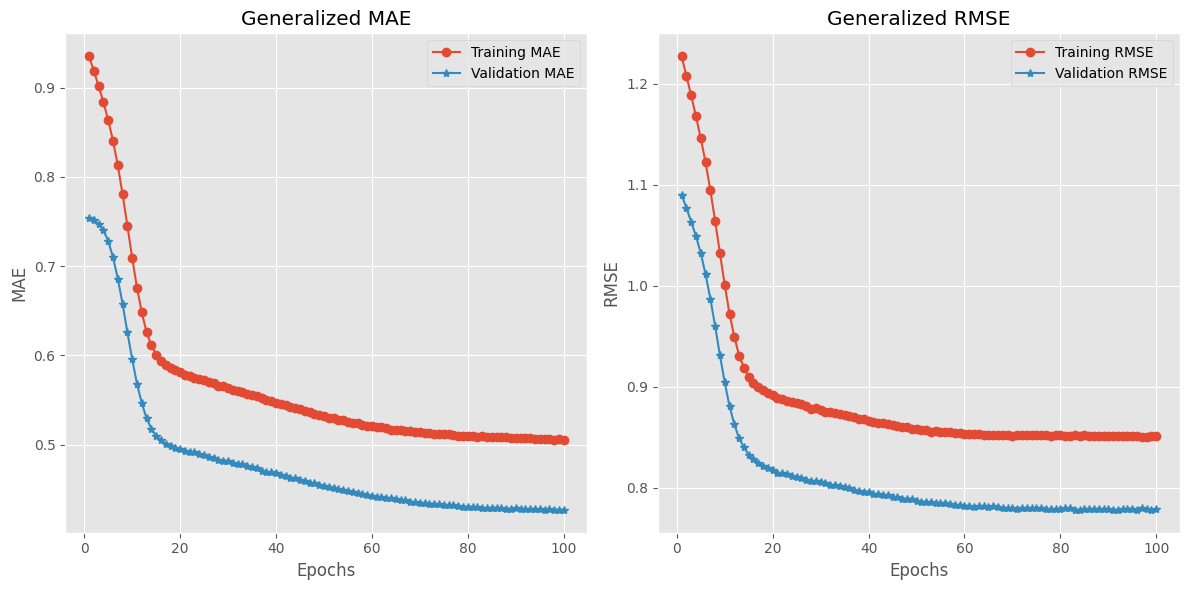

In [13]:
plot_loss_curves(history2)

In [17]:
model_all_train.eval()
abs_patients_errors, squared_patients_errors= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


In [10]:
# model_all_train.eval()  # Set the model to evaluation mode
# criterion = nn.MSELoss(reduction='none')  # MSE without reduction (so we can manually exclude masked values)
# running_test_loss = 0.0
# valid_preds = []
# valid_targets = []
# mask_value = -2.5
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model_all_train = model_all_train.to(device)
# rmse_patients_errors = {}
# mae_patients_errors = {}
# abs_patients_errors =  {key: [] for key in range(13)}
# squared_patients_errors =  {key: [] for key in range(13)}

# i=0
# with torch.no_grad():  # Disable gradient calculation for evaluation
#     for inputs, targets in test_loader:
#         i+=1
#         # Move data to device (GPU or CPU)
#         inputs = [inp.to(device) for inp in inputs]
#         targets = targets.to(device)
#         # print(targets[0])
#         # print(targets)
#         # Forward pass
#         outputs = model_all_train(inputs)
        
#         # # # Convert to numpy arrays for masking
#         outputs_np = outputs.cpu().numpy()
#         targets_np = targets.cpu().numpy()

#         for i in range(len(targets_np)): #this prints a list of 12 values of each patient
#             for j in range(len(targets_np[i])):
#                 if targets[i][j] != mask_value:
#                     sub_output = scaler.inverse_transform([[outputs_np[i][j]]])[0][0]
#                     sub_target = scaler.inverse_transform([[targets_np[i][j]]])[0][0]
#                     abs_patients_errors[j].append(abs(sub_output-sub_target))
#                     squared_patients_errors[j].append((sub_output-sub_target) ** 2)

In [19]:
patients_list = ['559', '563', '570', '575', '588', '591', '540', '544', '552', '567', '584', '596']
all_mae = []
all_rmse = []
for i in range(len(squared_patients_errors)-1):
    mae = np.mean(abs_patients_errors[i])
    rmse = np.sqrt(np.mean(squared_patients_errors[i]))
    all_mae.append(mae)
    all_rmse.append(rmse)
    print(f"{patients_list[i]}: RMSE: {rmse}, MAE: {mae}")
print(f"Average MAE: {np.mean(all_mae)}")
print(f"Average RMSE: {np.mean(all_rmse)}")


559: RMSE: 10.7892878791789, MAE: 8.134491284312814
563: RMSE: 15.864988953270464, MAE: 11.104398036610315
570: RMSE: 9.44019164483062, MAE: 6.730193080202984
575: RMSE: 19.179529405238775, MAE: 12.699248476284549
588: RMSE: 17.58048117944993, MAE: 12.753819199465097
591: RMSE: 17.933122740699307, MAE: 11.547077722432409
540: RMSE: 17.069087497336614, MAE: 12.689434651280996
544: RMSE: 16.087915565477807, MAE: 11.234599046075177
552: RMSE: 16.07376161696751, MAE: 12.850701684369467
567: RMSE: 26.235300465165842, MAE: 20.656728507850154
584: RMSE: 13.308503725980527, MAE: 10.743746769954258
596: RMSE: 24.78399173571093, MAE: 19.94710747708795
Average MAE: 12.590962161327182
Average RMSE: 17.02884686744227
